## [Body Fat Prediction Dataset 데이터 분석] 
 * [생활-건강]
 * Body fat estimates and various body circumference measurements for 252 men
 * 252명의 남성에 대한 체지방 추정 및 다양한 신체 둘레 측정
 * 데이터 출처 : https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset
 
 * 데이터 분석 코드
   * [github 코드](https://github.com/LDJWJ/dataAnalysis/blob/main/01_09_bodyFatPredict.ipynb)
   * [HTML코드](https://ldjwj.github.io/dataAnalysis/01_09_bodyFatPredict.html)

### 데이터 셋 개요
 * 252명의 남성에 대한 체지방 추정 및 다양한 신체 둘레 측정 
 * 데이터 파일
   * bodyfat.csv

### 데이터 설명

* Input/output variables 
<pre>
Density  밀도  
BodyFat  체지방 
Age      나이  
Weight   무게  
Height   키
Neck     목   
Chest    가슴 
Abdomen  복부  
Hip      엉덩이 
Thigh    허벅지 
Knee     무릎   
Ankle    발목  
Biceps   이두근 
Forearm  팔뚝  
Wrist    손목  
</pre>

### 라이브러리 불러오기

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 데이터 불러오기

In [7]:
bodyFat = pd.read_csv("../dataset/bodyFat/bodyfat.csv")

bodyFat.shape

(252, 15)

* 데이터 셋 : 252개 15열

In [8]:
print( bodyFat.columns )

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')


In [9]:
bodyFat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [11]:
bodyFat.info()  # 252개의 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [12]:
### 결측치가 없음.
bodyFat.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


### 과제 - 다른 데이터를 이용하여 체지방을 예측 

In [13]:
bodyFat.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [15]:
# 나이, 몸무게, 키, 목, 가슴, 엉덩이
sel = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Hip']

X = bodyFat[sel]
y = bodyFat['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 6), (76, 6), (176,), (76,))

<AxesSubplot:xlabel='BodyFat', ylabel='Count'>

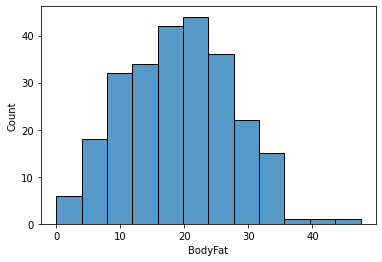

In [16]:
sns.histplot(x="BodyFat", data=bodyFat)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)


RandomForestRegressor()

In [19]:
print("의사결정트리 score :", model1.score(X_train, y_train), model1.score(X_test, y_test) )
print("랜덤포레스트 score :", model2.score(X_train, y_train), model2.score(X_test, y_test) )

의사결정트리 score : 1.0 0.32085698666368523
랜덤포레스트 score : 0.9309207406330781 0.5753174565316257


In [24]:
depth_num = range(1,10,1)

for num in depth_num:
    model = RandomForestRegressor(max_depth=num, random_state=0)
    model.fit(X_train, y_train)
    print("max_depth : ", num)
    print("랜덤포레스트 score :", model.score(X_train, y_train), model.score(X_test, y_test) )

    mse_val = np.sum(  (pred - y_test) ** 2 ) / len(pred)
    rmse_val = np.sqrt(mse_val)

    print(f"mse value : {mse_val} rmse value : {rmse_val}")

max_depth :  1
랜덤포레스트 score : 0.4158316318292994 0.42983822777486524
mse value : 25.860170950978183 rmse value : 5.085289662445806
max_depth :  2
랜덤포레스트 score : 0.5553441723212192 0.49253765668398475
mse value : 25.860170950978183 rmse value : 5.085289662445806
max_depth :  3
랜덤포레스트 score : 0.6580582576976937 0.5332239242234865
mse value : 25.860170950978183 rmse value : 5.085289662445806
max_depth :  4
랜덤포레스트 score : 0.7369072348091439 0.5696317981682314
mse value : 25.860170950978183 rmse value : 5.085289662445806
max_depth :  5
랜덤포레스트 score : 0.802210298570559 0.5909355454916783
mse value : 25.860170950978183 rmse value : 5.085289662445806
max_depth :  6
랜덤포레스트 score : 0.8487408538195345 0.5901819058443694
mse value : 25.860170950978183 rmse value : 5.085289662445806
max_depth :  7
랜덤포레스트 score : 0.8826962920550664 0.5884612192620363
mse value : 25.860170950978183 rmse value : 5.085289662445806
max_depth :  8
랜덤포레스트 score : 0.9032672530894612 0.5872387868906784
mse value : 25.860170

### 최종 모델로 예측 후, mse, rmse 구하기

In [25]:
model1 = RandomForestRegressor(max_depth=6, random_state=0)
model1.fit(X_train, y_train)
pred = model1.predict(X_test)

In [26]:
# mse, rmse
mse_val = np.sum(  (pred - y_test) ** 2 ) / len(pred)
rmse_val = np.sqrt(mse_val)

print(f"mse value : {mse_val} rmse value : {rmse_val}")

mse value : 25.860170950978183 rmse value : 5.085289662445806
